In [110]:
import os
import sys

sys.path.append("..")  # Avoid error with importing of src
from src.utils_py.auxil import *
from src.utils_py.profile_approx import profile_approx, profile_approx_alpha, profile_approx_modified
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams['font.family'] = 'Helvetica'

---

In [97]:
T = 40_000
dT = 5_000
step = 2_500

In [98]:
scale = '2.0'
path = os.path.join('../data', f'dens_{scale}')

In [ ]:
angles_1 = []
time_1 = []

for t_end in range(dT, T+1, step):
    t_start = t_end - dT

    folder = os.path.join(path, f'dens_{t_end}')
    H = 9
    l, phi = 18.004 / H, 0.5

    z, dens, best = profile_approx(
        dens_profile_file=os.path.join(folder, 'dens.xvg'),
        rho_bulk=3.0896 * 10,
        l=l,
        phi=phi,
        H=H,
        interface_type='roll'
    )

    angles_1.append(np.rad2deg(best['theta']))
    time_1.append(t_end)

    print('Time {}; Theta: {:.2f}'.format(t_end, np.rad2deg(best['theta'])))
    print('Real phi {:.3f}'.format(np.trapz(dens, z)))

    plt.figure(figsize=(8, 6))

    plt.grid(alpha=0.5)
    plt.plot(
        z, dens,
        label='decane',
        color='#FF8000',
        linewidth=2
    )

    plt.plot(
        z, rho_roll_theta(z, l, phi, best['theta']),
        label=r'approximation with $\theta$ = {:.1f}$^\circ$C'.format(np.rad2deg(best["theta"])),
        # color='#00B400',
        color='#D2001B',
        linewidth=2.5,
        linestyle='dashed'
    )

    plt.title(f'Theta at time: {t_end} ps', fontsize=18)
    # plt.xlim(-0.9, 0.9)
    # plt.ylim(-0.75, 0.75)
    plt.xlabel('z', fontsize=14)
    plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower center', fontsize=14)
    plt.ylim(bottom=-0.1)
    plt.show()

In [ ]:
angles_2 = []
time_2 = []

for t_end in range(dT, T+1, step):
    t_start = t_end - dT

    folder = os.path.join(path, f'dens_{t_end}')

    z, dens, l, phi, H, best = profile_approx_modified(
        structure_file=os.path.join(folder, f'dump_{t_end}.gro'),
        dens_profile_file=os.path.join(folder, 'dens.xvg'),
        rho_bulk=3.0896 * 10,
        droplet_mols=['DECAN'],
        interface_type='roll'
    )

    angles_2.append(np.rad2deg(best['theta']))
    time_2.append(t_end)

    print('Time {}; Theta: {:.2f}; Offset: {:.2f}'.format(t_end, np.rad2deg(best['theta']), best['offset']))
    print('Real phi {:.3f}'.format(np.trapz(dens, z)))

    plt.figure(figsize=(8, 6))
    # fig, ax = plt.subplots(1, 3, figsize=(16, 6))


    plt.grid(alpha=0.5)
    plt.plot(
        z, dens,
        label='decane',
        color='#FF8000',
        linewidth=2
    )

    plt.plot(
        z, rho_roll_theta(z, l, phi, best['theta']) + best['offset'],
        label=r'approximation with $\theta$ = {:.1f}$^\circ$C'.format(np.rad2deg(best["theta"])),
        # color='#00B400',
        color='#D2001B',
        linewidth=2.5,
        linestyle='dashed'
    )

    # plt.xlim(-0.9, 0.9)
    # plt.ylim(-0.75, 0.75)
    plt.title(f'Modified at time: {t_end} ps', fontsize=18)
    plt.xlabel('z', fontsize=14)
    plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower center', fontsize=14)
    plt.ylim(bottom=-0.1)
    plt.show()

In [ ]:
angles_3 = []
time_3 = []

for t_end in range(dT, T+1, step):
    t_start = t_end - dT

    folder = os.path.join(path, f'dens_{t_end}')
    H = 9
    l, phi = 18.004 / H, 0.5

    z, dens, best = profile_approx_alpha(
        dens_profile_file=os.path.join(folder, 'dens.xvg'),
        rho_bulk=3.0896 * 10,
        l=l,
        phi=phi,
        H=H,
        interface_type='roll'
    )

    angles_3.append(np.rad2deg(best['theta']))
    time_3.append(t_end)

    print('Time {}; Theta: {:.2f}: Delta: {:.2e}'.format(t_end, np.rad2deg(best['theta']), best['delta']))
    print('Real phi {:.3f}'.format(np.trapz(dens, z)))

    plt.figure(figsize=(8, 6))

    plt.grid(alpha=0.5)
    plt.plot(
        z, dens,
        label='decane',
        color='#FF8000',
        linewidth=2
    )

    plt.plot(
        z, rho_roll_alpha(z, l, phi, best['theta'], best['delta']),
        label=r'approximation with $\theta$ = {:.1f}$^\circ$C'.format(np.rad2deg(best["theta"])),
        # color='#00B400',
        color='#D2001B',
        linewidth=2.5,
        linestyle='dashed'
    )

    plt.title(f'Alpha at time: {t_end} ps', fontsize=18)
    # plt.xlim(-0.9, 0.9)
    # plt.ylim(-0.75, 0.75)
    plt.xlabel('z', fontsize=14)
    plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower center', fontsize=14)
    plt.ylim(bottom=-0.1)
    plt.show()

131.2227223419788


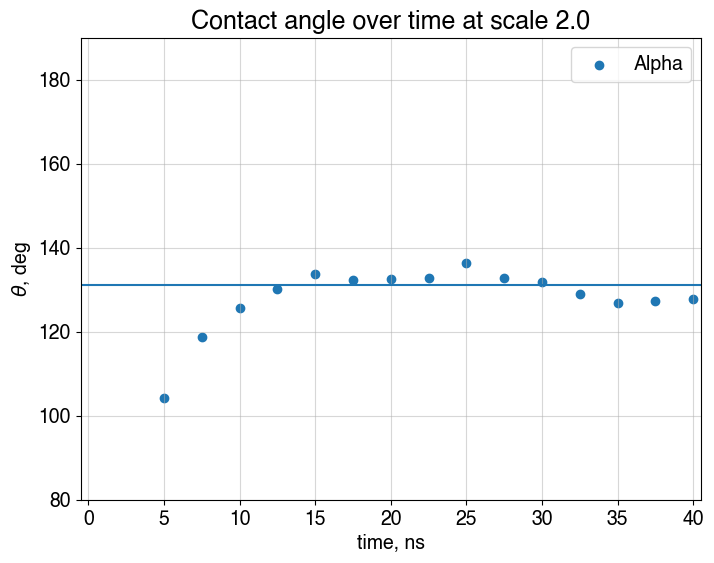

In [102]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

# plt.scatter(np.array(time_1) * 1e-3, angles_1, label='Theta')
# plt.scatter(np.array(time_2) * 1e-3, angles_2, label='Modified')
plt.scatter(np.array(time_3) * 1e-3, angles_3, label='Alpha')

begin = 4
plt.hlines(np.mean(angles_3[begin:]), -0.5, 40.5)
print(np.mean(angles_3[begin:]))

plt.title(f'Contact angle over time at scale {scale}', fontsize=18)
plt.xlim(-0.5, 40.5)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

---

## Different scaling

In [142]:
angles_scale = []
time_scale = []

T = 40_000
dT = 5_000
scales = [2.0, 2.1, 2.2, 2.3, 2.4, 2.5]
step = 2_500


for i, sc in enumerate(scales):
    angles_scale.append([])
    time_scale.append([])

    path = os.path.join('../data', f'dens_{sc}')

    for t_end in range(dT, T+1, step):
        t_start = t_end - dT

        folder = os.path.join(path, f'dens_{t_end}')
        H = 9
        l, phi = 18.004 / H, 0.5

        z, dens, best = profile_approx_alpha(
            dens_profile_file=os.path.join(folder, 'dens.xvg'),
            rho_bulk=3.0896 * 10,
            l=l,
            phi=phi,
            H=H,
            interface_type='roll',
            display=False
        )

        angles_scale[i].append(np.rad2deg(best['theta']))
        time_scale[i].append(t_end)

        print('Time {}; Theta: {:.2f}: Delta: {:.2f}'.format(t_end, np.rad2deg(best['theta']), best['theta']))
        print('Real phi {:.3f}'.format(np.trapz(dens, z)))


Time 5000; Theta: 104.17: Delta: 1.82
Real phi 0.500
Time 7500; Theta: 118.72: Delta: 2.07
Real phi 0.500
Time 10000; Theta: 125.66: Delta: 2.19
Real phi 0.500
Time 12500; Theta: 130.24: Delta: 2.27
Real phi 0.500
Time 15000; Theta: 133.82: Delta: 2.34
Real phi 0.500
Time 17500; Theta: 132.34: Delta: 2.31
Real phi 0.500
Time 20000; Theta: 132.66: Delta: 2.32
Real phi 0.500
Time 22500; Theta: 132.72: Delta: 2.32
Real phi 0.500
Time 25000; Theta: 136.30: Delta: 2.38
Real phi 0.500
Time 27500; Theta: 132.71: Delta: 2.32
Real phi 0.500
Time 30000; Theta: 131.93: Delta: 2.30
Real phi 0.500
Time 32500; Theta: 129.03: Delta: 2.25
Real phi 0.500
Time 35000; Theta: 126.86: Delta: 2.21
Real phi 0.500
Time 37500; Theta: 127.30: Delta: 2.22
Real phi 0.500
Time 40000; Theta: 127.79: Delta: 2.23
Real phi 0.500
Time 5000; Theta: 104.08: Delta: 1.82
Real phi 0.500
Time 7500; Theta: 114.28: Delta: 1.99
Real phi 0.500
Time 10000; Theta: 118.82: Delta: 2.07
Real phi 0.500
Time 12500; Theta: 122.10: Delta

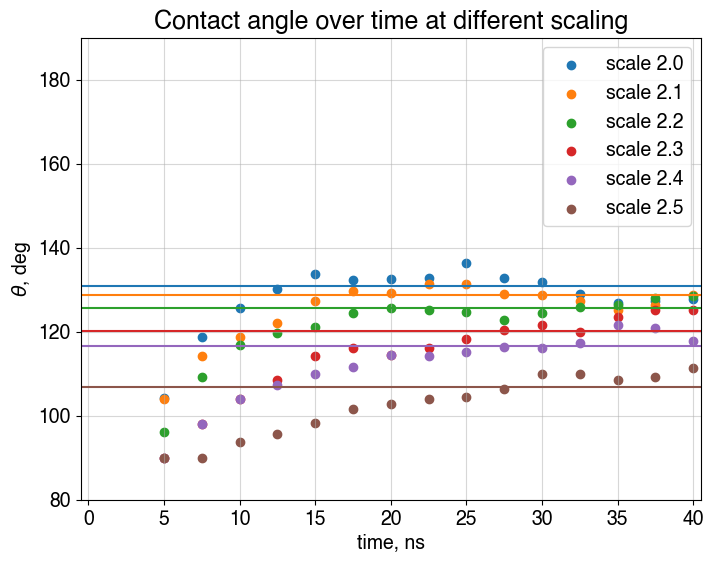

In [162]:
cmap = matplotlib.colormaps['tab10']
mean_angles = []
std_angles = []

plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

begin = 5
for i, sc, angle, time in zip(range(len(scales)), scales, angles_scale, time_scale):
    mean_angle = np.mean(angle[begin:])
    std = np.std(angle[begin:])
    mean_angles.append(mean_angle)
    std_angles.append(std)
    # plt.scatter(np.array(time) * 1e-3, angle, label=f'scale {sc}\nangle {mean_angle:.1f} ± {std:.1f}')
    plt.scatter(np.array(time) * 1e-3, angle, label=f'scale {sc}')
    plt.hlines(mean_angle, -0.5, 40.5, colors=cmap(i))

plt.title('Contact angle over time at different scaling', fontsize=18)
plt.xlim(-0.5, 40.5)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


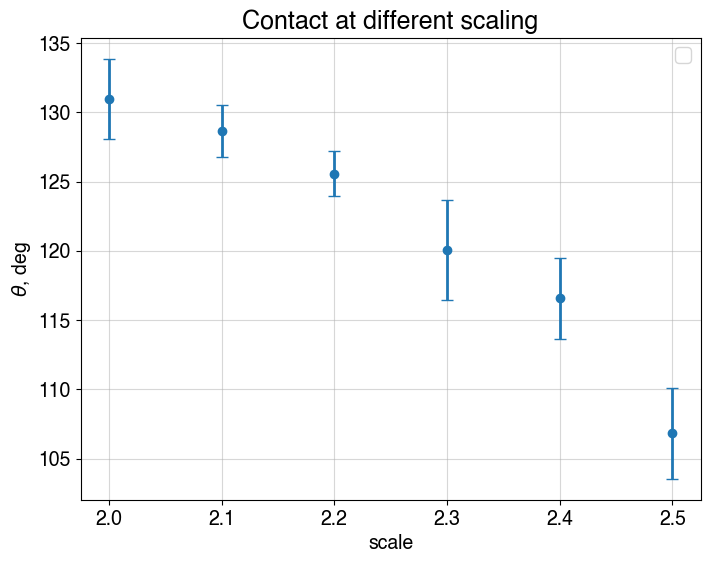

In [166]:
cmap = matplotlib.colormaps['tab10']

plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

plt.errorbar(scales, mean_angles, std_angles, elinewidth=2, capsize=4, fmt='o')

plt.title('Contact at different scaling', fontsize=18)
# plt.xlim(-0.5, 40.5)
# plt.ylim(80, 190)
plt.xlabel('scale', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()

In [ ]:
"{:.2e}".format(Cij['C12'])

'9.19e-06'

---

## Different averaging time

In [63]:
T = 20_000
dT = 4_000
step = 1_000

scale = '2.0'
path = os.path.join('../data', f'dens_{scale}_ave_{dT}')

Optimization terminated successfully.
         Current function value: 2.513917
         Iterations: 27
         Function evaluations: 50
Time 5000; Theta: 131.62: Delta: 2.30
Real phi 0.500


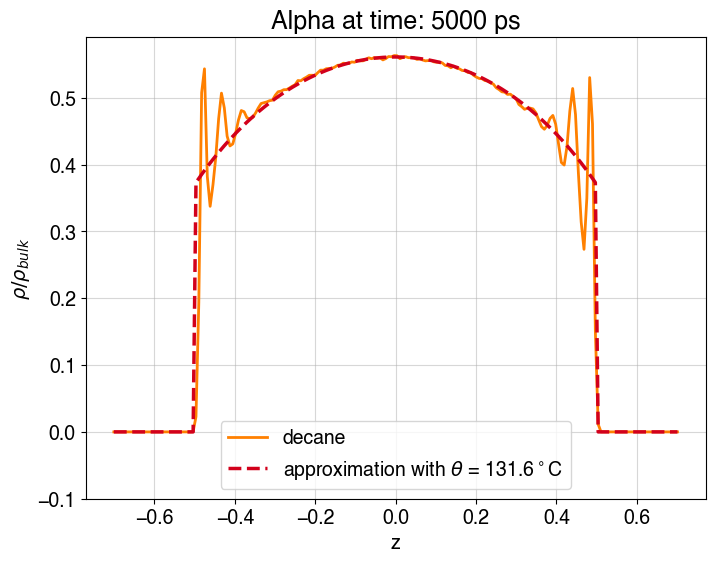

Optimization terminated successfully.
         Current function value: 2.008783
         Iterations: 57
         Function evaluations: 107
Time 10000; Theta: 130.38: Delta: 2.28
Real phi 0.500


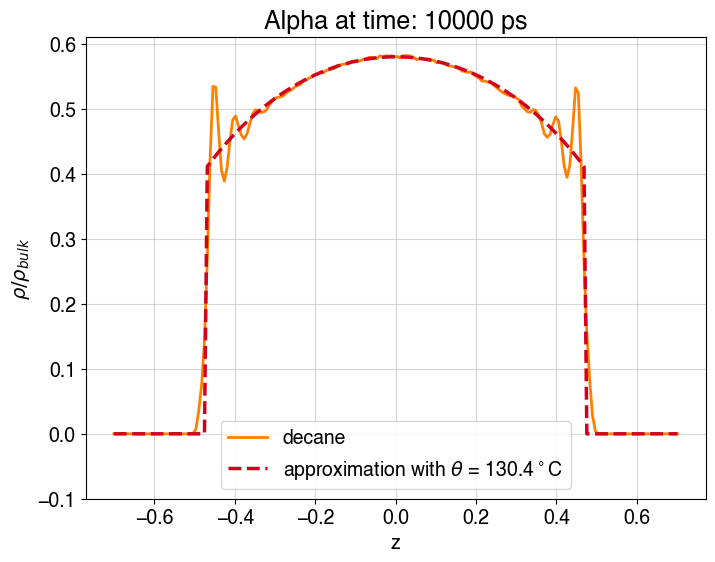

Optimization terminated successfully.
         Current function value: 2.040340
         Iterations: 61
         Function evaluations: 119
Time 15000; Theta: 128.07: Delta: 2.24
Real phi 0.500


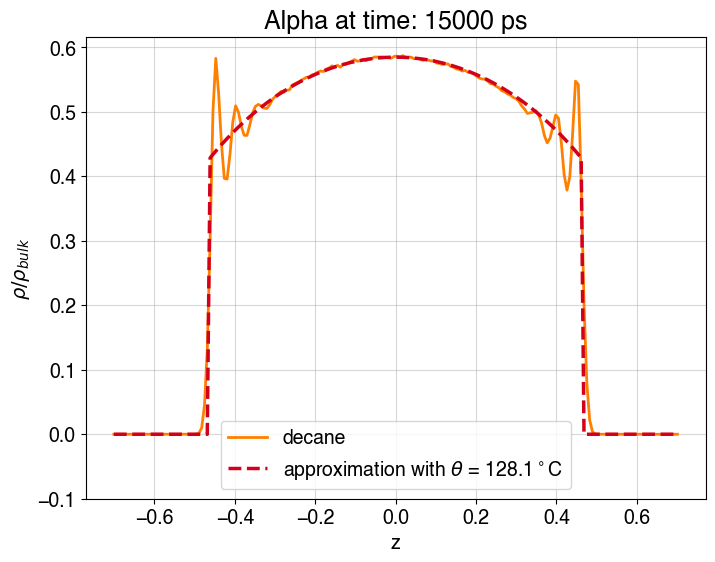

Optimization terminated successfully.
         Current function value: 1.896434
         Iterations: 66
         Function evaluations: 124
Time 20000; Theta: 128.44: Delta: 2.24
Real phi 0.500


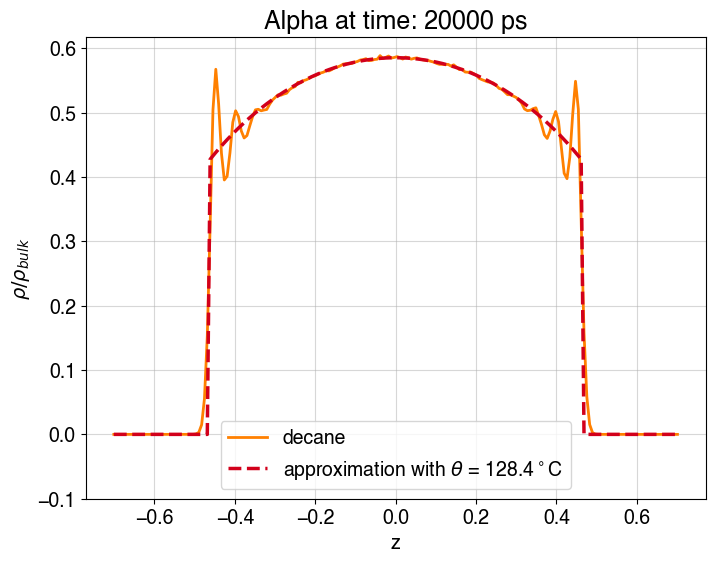

In [73]:
T = 20_000
dT = 5_000

scale = '2.0'
path = os.path.join('../data', f'dens_{scale}_ave_{dT}')

for t_end in range(dT, T+1, dT):
    t_start = t_end - dT

    folder = os.path.join(path, f'dens_{t_end}')
    H = 9
    l, phi = 18.004 / H, 0.5

    z, dens, best = profile_approx_alpha(
        dens_profile_file=os.path.join(folder, 'dens.xvg'),
        rho_bulk=3.0896 * 10,
        l=l,
        phi=phi,
        H=H,
        interface_type='roll'
    )

    print('Time {}; Theta: {:.2f}: Delta: {:.2f}'.format(t_end, np.rad2deg(best['theta']), best['theta']))
    print('Real phi {:.3f}'.format(np.trapz(dens, z)))

    plt.figure(figsize=(8, 6))

    plt.grid(alpha=0.5)
    plt.plot(
        z, dens,
        label='decane',
        color='#FF8000',
        linewidth=2
    )

    plt.plot(
        z, rho_roll_alpha(z, l, phi, best['theta'], best['delta']),
        label=r'approximation with $\theta$ = {:.1f}$^\circ$C'.format(np.rad2deg(best["theta"])),
        # color='#00B400',
        color='#D2001B',
        linewidth=2.5,
        linestyle='dashed'
    )

    plt.title(f'Alpha at time: {t_end} ps', fontsize=18)
    # plt.xlim(-0.9, 0.9)
    # plt.ylim(-0.75, 0.75)
    plt.xlabel('z', fontsize=14)
    plt.ylabel(r'$\rho / \rho_{bulk}$', fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(loc='lower center', fontsize=14)
    plt.ylim(bottom=-0.1)
    plt.show()

In [76]:
angles_ave = []
time_ave = []

T = 20_000
dT = [5_000, 4_000, 3_000, 2_000]
step = 1_000

scale = '2.0'
for i, dt in enumerate(dT):
    angles_ave.append([])
    time_ave.append([])

    path = os.path.join('../data', f'dens_{scale}_ave_{dt}')

    for t_end in range(dt, T+1, step):
        t_start = t_end - dt

        folder = os.path.join(path, f'dens_{t_end}')
        H = 9
        l, phi = 18.004 / H, 0.5

        z, dens, best = profile_approx_alpha(
            dens_profile_file=os.path.join(folder, 'dens.xvg'),
            rho_bulk=3.0896 * 10,
            l=l,
            phi=phi,
            H=H,
            interface_type='roll'
        )

        angles_ave[i].append(np.rad2deg(best['theta']))
        time_ave[i].append(t_end)

        print('Time {}; Theta: {:.2f}: Delta: {:.2f}'.format(t_end, np.rad2deg(best['theta']), best['theta']))
        print('Real phi {:.3f}'.format(np.trapz(dens, z)))


Optimization terminated successfully.
         Current function value: 2.513917
         Iterations: 27
         Function evaluations: 50
Time 5000; Theta: 131.62: Delta: 2.30
Real phi 0.500
Optimization terminated successfully.
         Current function value: 1.393121
         Iterations: 34
         Function evaluations: 66
Time 6000; Theta: 133.83: Delta: 2.34
Real phi 0.500
Optimization terminated successfully.
         Current function value: 1.680674
         Iterations: 36
         Function evaluations: 71
Time 7000; Theta: 132.77: Delta: 2.32
Real phi 0.500
Optimization terminated successfully.
         Current function value: 1.986159
         Iterations: 44
         Function evaluations: 80
Time 8000; Theta: 131.43: Delta: 2.29
Real phi 0.500
Optimization terminated successfully.
         Current function value: 2.112200
         Iterations: 51
         Function evaluations: 95
Time 9000; Theta: 132.07: Delta: 2.30
Real phi 0.500
Optimization terminated successfully.
       

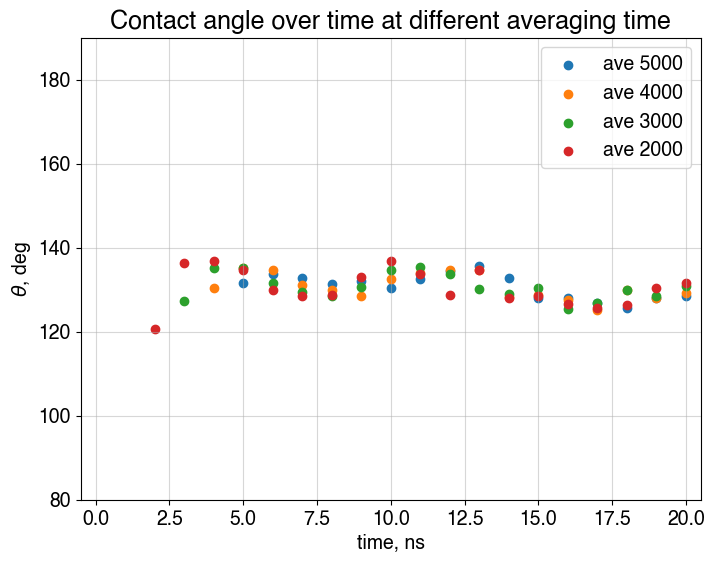

In [77]:
plt.figure(figsize=(8, 6))
plt.grid(alpha=0.5)

for dt, angle, time in zip(dT, angles_ave, time_ave):
    plt.scatter(np.array(time) * 1e-3, angle, label=f'ave {dt}')

plt.title('Contact angle over time at different averaging time', fontsize=18)
plt.xlim(-0.5, 20.5)
plt.ylim(80, 190)
plt.xlabel('time, ns', fontsize=14)
plt.ylabel(r'$\theta$, deg', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc='best', fontsize=14)
plt.show()